# 10. Training Neural Networks with Keras 

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0-alpha0'

In [3]:
keras.__version__

'2.2.4-tf'

## Import the MNIST dataset 

In [4]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [8]:
y_train_full.shape

(60000,)

In [7]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## 1. Training Model with **Sequential API**
### (1) Define the model

Alternatively, you can add the layers one by one:
```python
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
model.add(keras.layers.Dense(1))
optimizer = keras.optimizers.SGD(lr=learning_rate)
model.compile(loss="mse", optimizer=optimizer)
```

In [11]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(25, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


#### API's for checking and manipulating layers:
- Get a list of the model's layers: `model.layers`
- Access to parameters: `weights, biases = hidden.get_weights()`
- Set weights: `hidden.set_weights()`

### (2) Compile the model

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### (3) Training the model

In [20]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3086 - accuracy: 0.9123 - val_loss: 0.2902 - val_accuracy: 0.9184
Epoch 2/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3064 - accuracy: 0.9132 - val_loss: 0.2878 - val_accuracy: 0.9190
Epoch 3/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.3042 - accuracy: 0.9136 - val_loss: 0.2857 - val_accuracy: 0.9196
Epoch 4/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3020 - accuracy: 0.9141 - val_loss: 0.2838 - val_accuracy: 0.9184
Epoch 5/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.3000 - accuracy: 0.9149 - val_loss: 0.2823 - val_accuracy: 0.9208
Epoch 6/30
55000/55000 [==============================] - 3s 53us/sample - loss: 0.2980 - accuracy: 0.9153 - val_loss: 0.2804 - val_accuracy: 0.9204
Epoch 7/30
55000/55000 [==============================] -

Note: instead of setting `validation_data`, could set `validation_split=0.1` for cross validation.

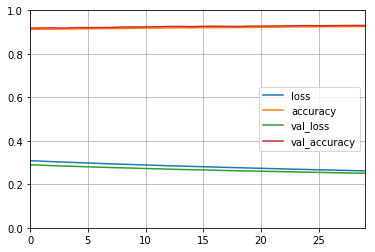

In [21]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### (4) Evaluate Model and Make Predictions

In [22]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.2528 - accuracy: 0.9290


[0.25282798545658586, 0.929]

In [33]:
X_42 = X_test[42:43]
model.predict(X_42).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.86, 0.  , 0.  , 0.02, 0.  , 0.11]],
      dtype=float32)

In [34]:
model.predict_classes(X_42)

array([4])

In [31]:
y_test[42]

4

### Build a Regression MLP

Differences from the classification MLP:

1. The output layer has a single neuron with no activation function: `    layers.Dense(1)`
2. Use MSQ as loss function: `model.compile(loss="mean_squared_error", optimizer="sgd")`

## 2. Building Complex Models with **Functional API**

eg. Build a *Wide & Deep neural network* (Heng-Tze Chent et al., 2016)
### (1-4) Define -> Compile -> Train -> Evaluate / Predict

In [55]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
flatten = keras.layers.Flatten(input_shape=[28, 28])(input_)
hidden1 = keras.layers.Dense(30, activation="relu")(flatten)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([flatten, hidden2])
output = keras.layers.Dense(10, activation="softmax")(concat)
model2 = keras.Model(inputs=[input_], outputs=[output])

In [56]:
model2.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 784)          0           input_9[0][0]                    
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           23550       flatten_6[0][0]                  
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 30)           930         dense_23[0][0]                   
____________________________________________________________________________________________

In [57]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [63]:
history = model2.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.2616 - accuracy: 0.9267 - val_loss: 0.2478 - val_accuracy: 0.9296
Epoch 2/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2596 - accuracy: 0.9270 - val_loss: 0.2459 - val_accuracy: 0.9302
Epoch 3/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.2576 - accuracy: 0.9276 - val_loss: 0.2441 - val_accuracy: 0.9312
Epoch 4/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.2556 - accuracy: 0.9279 - val_loss: 0.2425 - val_accuracy: 0.9312
Epoch 5/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.2537 - accuracy: 0.9285 - val_loss: 0.2406 - val_accuracy: 0.9324
Epoch 6/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.2518 - accuracy: 0.9288 - val_loss: 0.2388 - val_accuracy: 0.9318
Epoch 7/30
55000/55000 [==============================] -

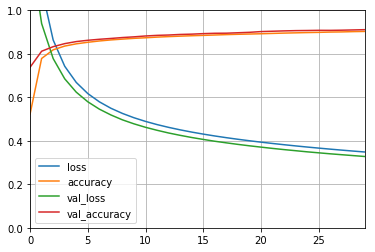

In [59]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [72]:
model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.1085 - accuracy: 0.9677


[0.1084565799404867, 0.9677]

## Save & Restore the model

In [64]:
model2.save("functional_model.h5")

In [ ]:
reloaded_model = keras.models.load_model("functional_model.h5")

## Callbacks: **ModelCheckpoint** & **EarlyStopping**

Autosave your models at regular intervals and stops early when no progress is made on the validation set.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("functional_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

## Write logs and use TensorBoard

In [67]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [71]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 58us/sample - loss: 0.0797 - accuracy: 0.9778 - val_loss: 0.1077 - val_accuracy: 0.9680
Epoch 2/100
55000/55000 [==============================] - 3s 57us/sample - loss: 0.0794 - accuracy: 0.9782 - val_loss: 0.1079 - val_accuracy: 0.9674
Epoch 3/100
55000/55000 [==============================] - 3s 58us/sample - loss: 0.0793 - accuracy: 0.9780 - val_loss: 0.1076 - val_accuracy: 0.9680
Epoch 4/100
55000/55000 [==============================] - 3s 63us/sample - loss: 0.0790 - accuracy: 0.9784 - val_loss: 0.1073 - val_accuracy: 0.9674
Epoch 5/100
55000/55000 [==============================] - 3s 57us/sample - loss: 0.0788 - accuracy: 0.9784 - val_loss: 0.1074 - val_accuracy: 0.9668
Epoch 6/100
55000/55000 [==============================] - 3s 58us/sample - loss: 0.0785 - accuracy: 0.9786 - val_loss: 0.1073 - val_accuracy: 0.9678
Epoch 7/100
55000/55000 [==========================

55000/55000 [==============================] - 3s 56us/sample - loss: 0.0687 - accuracy: 0.9813 - val_loss: 0.1052 - val_accuracy: 0.9696
Epoch 55/100
55000/55000 [==============================] - 3s 55us/sample - loss: 0.0685 - accuracy: 0.9810 - val_loss: 0.1051 - val_accuracy: 0.9682
Epoch 56/100
55000/55000 [==============================] - 3s 56us/sample - loss: 0.0683 - accuracy: 0.9813 - val_loss: 0.1055 - val_accuracy: 0.9694
Epoch 57/100
55000/55000 [==============================] - 3s 55us/sample - loss: 0.0680 - accuracy: 0.9811 - val_loss: 0.1051 - val_accuracy: 0.9678
Epoch 58/100
55000/55000 [==============================] - 3s 56us/sample - loss: 0.0680 - accuracy: 0.9812 - val_loss: 0.1049 - val_accuracy: 0.9682
Epoch 59/100
55000/55000 [==============================] - 3s 55us/sample - loss: 0.0677 - accuracy: 0.9813 - val_loss: 0.1051 - val_accuracy: 0.9694
Epoch 60/100
55000/55000 [==============================] - 3s 60us/sample - loss: 0.0676 - accuracy: 0.981

To visualize in TensorBoard:
`tensorboard --logdir=./my_logs --port=6006`

## Fine-Tuing Neural Network Hyperparameters

Hyperparameters such as:
+ Learning rate: `lr`
+ Number of hidden layers (tip: 1-2 layers)
+ Number of neurons in hidden layers (tip: reversed pyramid shape)

Wrap the keras model in a sklearn model:
`keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model_function)`
and use `RandomSearchCV` or `GridSearchCV`